### Objective:
In 2022, Vrinda stores noticed a huge set of sales. This was noticed since the store embraced online marketing at the beginning of the year and the employing of a Data Analyst.

Vrinda Store wants to create an annual sales report for 2022 so that the store can understand its marketing strategy and grow more sales in 2023.
The task is to create an analysis and derive insights from the 2022 store sales and share them with stakeholders, so we can plan better for 2023.
Questions asked:

• Compare the monthly sales and orders using a single chart.
• Find out which month got the highest sales and orders.
• Who purchased more in 2022, men or women?
• What is the different order status in 2022?
• What are the top 5 states that contributed to maximum sales?
• Show the relation between Age and gender based on the number of orders.
• Which channel is contributing to maximum sales?
• Highest Selling Category?

In [ ]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = r"C:\Users\akinb\OneDrive\Desktop\TECH FOLDER\Data Science\Data Science EDA\Vrinda Store Data Analysis excell.xlsx"

vrinda_store = pd.read_excel(path, index_col=0, parse_dates=["Date"])

vrinda_store

,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
index,,,,,,,,,,,,,,,,,,
1,171-1029312-3038738,1029312,Women,44,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
2,405-2183842-2225946,2183842,Women,29,2022-12-04,Delivered,Ajio,SET414-KR-NP-L,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
3,171-1641533-8921966,1641533,Women,67,2022-12-04,Delivered,Myntra,SET261-KR-PP-S,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
4,404-7490807-6300351,7490807,Women,20,2022-12-04,Delivered,Amazon,SET110-KR-PP-M,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
5,403-9293516-4577154,9293516,Women,62,2022-12-04,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31043,405-4724097-1016369,4724097,M,60,2022-01-06,Delivered,Flipkart,J0083-KR-XL,kurta,XL,One,INR,565,PUNE,MAHARASHTRA,412307,IN,False
31044,405-4724097-1016369,4724097,M,34,2022-01-06,Delivered,Myntra,J0010-LCD-S,Set,S,One,INR,939,BENGALURU,KARNATAKA,560061,IN,False
31045,408-3572295-5992330,3572295,M,29,2022-01-06,Delivered,Amazon,SET398-KR-PP-L,Set,L,One,INR,1115,PITHORAGARH,UTTARAKHAND,262501,IN,False


In [3]:
vrinda_store.head(20)

,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
index,,,,,,,,,,,,,,,,,,
1,171-1029312-3038738,1029312,Women,44,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
2,405-2183842-2225946,2183842,Women,29,2022-12-04,Delivered,Ajio,SET414-KR-NP-L,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
3,171-1641533-8921966,1641533,Women,67,2022-12-04,Delivered,Myntra,SET261-KR-PP-S,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
4,404-7490807-6300351,7490807,Women,20,2022-12-04,Delivered,Amazon,SET110-KR-PP-M,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
5,403-9293516-4577154,9293516,Women,62,2022-12-04,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False
6,407-1298130-0368305,1298130,Men,49,2022-12-04,Delivered,Flipkart,JNE3797-KR-XXL,Western Dress,XXL,One,INR,735,SANGLI MIRAJ KUPWAD,MAHARASHTRA,416436,IN,False
7,407-1298130-0368305,1298130,W,23,2022-12-04,Delivered,Meesho,JNE3801-KR-XXL,kurta,XXL,One,INR,735,BENGALURU,KARNATAKA,560029,IN,False
8,171-5561216-3398711,5561216,W,70,2022-12-04,Delivered,Others,JNE3405-KR-M,kurta,M,One,INR,435,GURUGRAM,HARYANA,122001,IN,False
9,408-2935263-2935550,2935263,W,75,2022-12-04,Delivered,Amazon,JNE3474-KR-E-XL,kurta,XL,One,INR,385,BENGALURU,KARNATAKA,562149,IN,False


In [4]:
vrinda_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31047 entries, 1 to 31047
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          31047 non-null  object        
 1   Cust ID           31047 non-null  int64         
 2   Gender            31047 non-null  object        
 3   Age               31047 non-null  int64         
 4   Date              31047 non-null  datetime64[ns]
 5   Status            31047 non-null  object        
 6   Channel           31047 non-null  object        
 7   SKU               31047 non-null  object        
 8   Category          31047 non-null  object        
 9   Size              31047 non-null  object        
 10  Qty               31047 non-null  object        
 11  currency          31047 non-null  object        
 12  Amount            31047 non-null  int64         
 13  ship-city         31047 non-null  object        
 14  ship-state        3104

In [5]:
vrinda_store["Gender"].unique()

array(['Women', 'Men', 'W', 'M'], dtype=object)

In [6]:
vrinda_store["Gender"]=vrinda_store["Gender"].replace(["M","W"], ["Men", "Women"])

vrinda_store["Gender"].unique()

array(['Women', 'Men'], dtype=object)

In [7]:
vrinda_store

,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
index,,,,,,,,,,,,,,,,,,
1,171-1029312-3038738,1029312,Women,44,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
2,405-2183842-2225946,2183842,Women,29,2022-12-04,Delivered,Ajio,SET414-KR-NP-L,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
3,171-1641533-8921966,1641533,Women,67,2022-12-04,Delivered,Myntra,SET261-KR-PP-S,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
4,404-7490807-6300351,7490807,Women,20,2022-12-04,Delivered,Amazon,SET110-KR-PP-M,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
5,403-9293516-4577154,9293516,Women,62,2022-12-04,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31043,405-4724097-1016369,4724097,Men,60,2022-01-06,Delivered,Flipkart,J0083-KR-XL,kurta,XL,One,INR,565,PUNE,MAHARASHTRA,412307,IN,False
31044,405-4724097-1016369,4724097,Men,34,2022-01-06,Delivered,Myntra,J0010-LCD-S,Set,S,One,INR,939,BENGALURU,KARNATAKA,560061,IN,False
31045,408-3572295-5992330,3572295,Men,29,2022-01-06,Delivered,Amazon,SET398-KR-PP-L,Set,L,One,INR,1115,PITHORAGARH,UTTARAKHAND,262501,IN,False


In [8]:
vrinda_store["Qty"].unique()

array([1, 'One', 2, 4, 3, 'Two', 5], dtype=object)

In [10]:
vrinda_store['Qty']=vrinda_store['Qty'].replace(['One','Two'], [1, 2])


In [11]:
vrinda_store["Qty"].unique()

array([1, 2, 4, 3, 5], dtype=int64)

In [62]:
vrinda_store['Month'] = vrinda_store['Date'].apply(lambda x: x.strftime('%B')) 
vrinda_store

,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Month,age_group
index,,,,,,,,,,,,,,,,,,,,
1,171-1029312-3038738,1029312,Women,44,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False,December,Adults
2,405-2183842-2225946,2183842,Women,29,2022-12-04,Delivered,Ajio,SET414-KR-NP-L,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False,December,Youth
3,171-1641533-8921966,1641533,Women,67,2022-12-04,Delivered,Myntra,SET261-KR-PP-S,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False,December,Elderly
4,404-7490807-6300351,7490807,Women,20,2022-12-04,Delivered,Amazon,SET110-KR-PP-M,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False,December,Youth
5,403-9293516-4577154,9293516,Women,62,2022-12-04,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False,December,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31043,405-4724097-1016369,4724097,Men,60,2022-01-06,Delivered,Flipkart,J0083-KR-XL,kurta,XL,1,INR,565,PUNE,MAHARASHTRA,412307,IN,False,January,Elderly
31044,405-4724097-1016369,4724097,Men,34,2022-01-06,Delivered,Myntra,J0010-LCD-S,Set,S,1,INR,939,BENGALURU,KARNATAKA,560061,IN,False,January,Adults
31045,408-3572295-5992330,3572295,Men,29,2022-01-06,Delivered,Amazon,SET398-KR-PP-L,Set,L,1,INR,1115,PITHORAGARH,UTTARAKHAND,262501,IN,False,January,Youth


In [13]:
# Compare the monthly sales and orders using a single chart.
result = vrinda_store.groupby('Month').aggregate({'Amount':'sum','Order ID':'count'})
result

,Amount,Order ID
Month,,
April,1829263,2685
August,1808505,2617
December,1622033,2384
February,1875932,2750
January,1820601,2702
July,1772300,2579
June,1750966,2597
March,1928066,2819
May,1797822,2617


<Axes: >

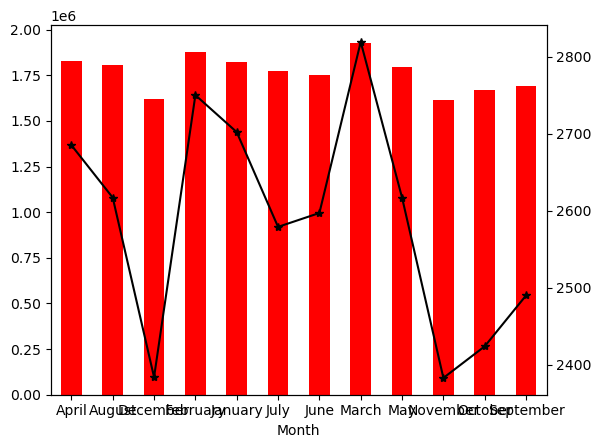

In [14]:
result['Amount'].plot(kind='bar', color='red')
result['Order ID'].plot(kind='line', marker='*', color='black',secondary_y=True)

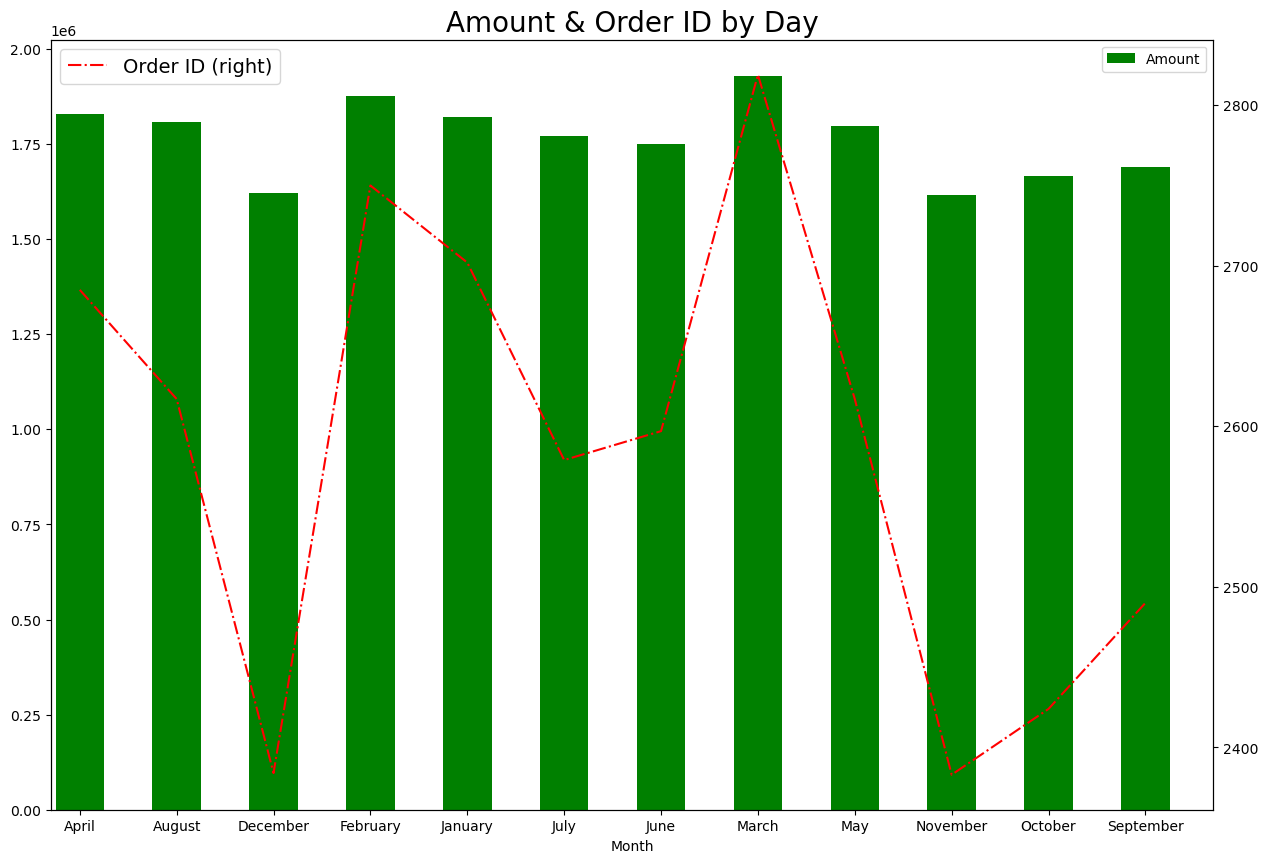

In [15]:
# Example 6 - Combo 1 bar graphs + Secondary Scale

weight = 0.30

result[["Amount"]].plot(kind="bar", color = ["green"], figsize=(15,10))
result["Order ID"].plot(color="red", linestyle = "-.", secondary_y=True)

plt.xticks(range(0,len(result["Amount"])), rotation = 90)
plt.title("Amount & Order ID by Day", fontsize = 20)
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("Month")
plt.xlim(-weight, len(result["Amount"])-weight)
plt.show()

# examples of Kind
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

(0.0, 3000.0)

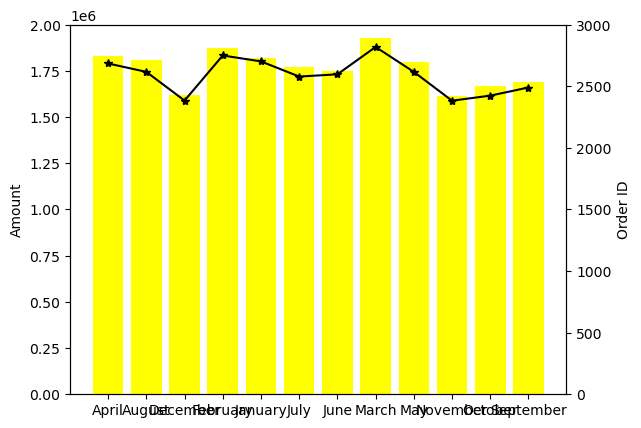

In [16]:
fig, ax1 = plt.subplots()

x=result['Order ID'].index
plt.bar(x,result['Amount'], color='yellow')
ax1.set_ylabel('Amount')
ax1.set_ylim(0, 2000000)

ax2 = ax1.twinx()

plt.plot(x,result['Order ID'], marker='*', color='black')
ax2.set_ylabel('Order ID')
ax2.set_ylim(0, 3000)

In [17]:
# Find out which month got the highest sales and orders.

highest_month = vrinda_store.groupby('Month', as_index=True).aggregate({'Amount':'sum','Order ID':'count'})

print(highest_month)

highest_month.idxmax()

            Amount  Order ID
Month                       
April      1829263      2685
August     1808505      2617
December   1622033      2384
February   1875932      2750
January    1820601      2702
July       1772300      2579
June       1750966      2597
March      1928066      2819
May        1797822      2617
November   1615356      2383
October    1666662      2424
September  1688871      2490


Amount      March
Order ID    March
dtype: object

In [18]:
# Find out which month got the highest sales and orders.

highest_month = vrinda_store.groupby('Month', as_index=True).aggregate({'Amount':'sum','Order ID':'count'})

print(highest_month)

highest_month.describe()

            Amount  Order ID
Month                       
April      1829263      2685
August     1808505      2617
December   1622033      2384
February   1875932      2750
January    1820601      2702
July       1772300      2579
June       1750966      2597
March      1928066      2819
May        1797822      2617
November   1615356      2383
October    1666662      2424
September  1688871      2490


,Amount,Order ID
count,1.200000e+01,12.000000
mean,1.764698e+06,2587.250000
std,9.891945e+04,142.697471
min,1.615356e+06,2383.000000
25%,1.683319e+06,2473.500000
50%,1.785061e+06,2607.000000
75%,1.822766e+06,2689.250000
max,1.928066e+06,2819.000000


In [19]:
# Who purchased more in 2022, men or women?
vrinda_store.groupby('Gender',as_index = False)['Amount'].aggregate('count')




,Gender,Amount
0,Men,9494
1,Women,21553


Gender
Men       9494
Women    21553
Name: Amount, dtype: int64


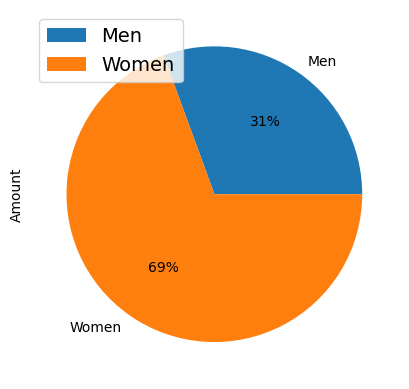

In [20]:
# Who purchased more in 2022, men or women?
vrinda_store.groupby('Gender')['Amount'].aggregate('count').plot(kind='pie', y='Amount',autopct='%1.0f%%')
plt.legend(loc="upper left", fontsize=14)

result_newnn = vrinda_store.groupby('Gender')['Amount'].aggregate('count')

print(result_newnn)

In [21]:
result_new = vrinda_store.groupby('Gender').aggregate({'Amount':'sum'})
result_new

,Amount
Gender,
Men,7613604
Women,13562773


In [37]:
# What is the different order status in 2022?

status_order = vrinda_store.groupby('Status', as_index=True).aggregate({'Order ID':'count'})

status_order



,Order ID
Status,
Cancelled,844
Delivered,28641
Refunded,517
Returned,1045


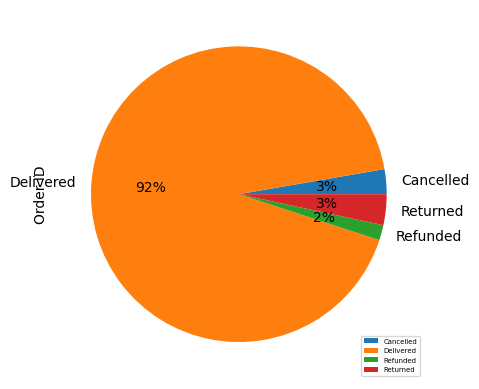

In [38]:
# What is the different order status in 2022?

status_order = vrinda_store.groupby('Status', as_index=True).aggregate({'Order ID':'count'}).plot(kind='pie', y='Order ID',autopct='%1.0f%%')

plt.legend(loc="lower right", fontsize=5)


In [42]:
# What is the different order status in 2022?

palette_color = sns.color_palette('bright')
explode = [0, 0.1, 0, 0]

#Ploting data on chat
plt.pie(status_order['Order_ID'], colors=palette_color,
        explode=explode, autopct='%.0f%%')

TypeError: 'Axes' object is not subscriptable

<Axes: xlabel='Status', ylabel='count'>

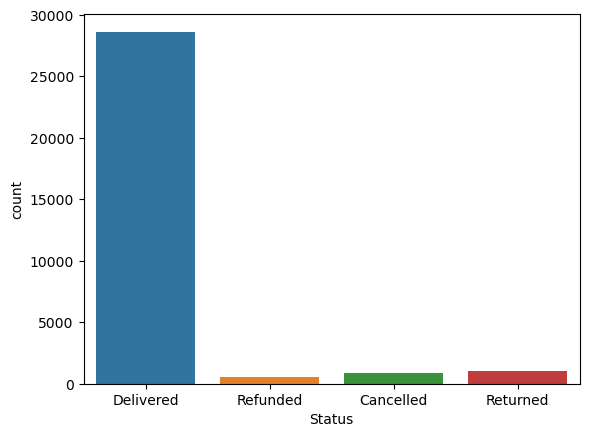

In [44]:
sns.countplot(x='Status', data=vrinda_store)

In [52]:
# What are the top 5 states that contributed to maximum sales?

highest_state = vrinda_store.groupby('ship-state', as_index=False).aggregate({'Amount':'sum'})

print(highest_state)



            ship-state   Amount
0   ANDAMAN & NICOBAR     51970
1       ANDHRA PRADESH   918499
2    ARUNACHAL PRADESH    35003
3                ASSAM   326423
4    Arunachal Pradesh     1235
5    Arunachal pradesh      602
6                BIHAR   440051
7                Bihar     5348
8           CHANDIGARH    60726
9         CHHATTISGARH   174531
10          Chandigarh     2333
11     DADRA AND NAGAR    14980
12               DELHI  1248111
13               Delhi    15772
14                 GOA   180029
15             GUJARAT   715563
16                 Goa     2773
17             HARYANA   813320
18    HIMACHAL PRADESH   146246
19     JAMMU & KASHMIR   158736
20           JHARKHAND   255054
21           KARNATAKA  2646358
22              KERALA  1008940
23              LADAKH    14148
24      MADHYA PRADESH   564026
25         MAHARASHTRA  2990221
26             MANIPUR    78526
27           MEGHALAYA    25988
28             MIZORAM    12182
29             Manipur      339
30      

In [53]:
ship_state=highest_state.nlargest(5, ['Amount'])

ship_state

,ship-state,Amount
25,MAHARASHTRA,2990221
21,KARNATAKA,2646358
43,UTTAR PRADESH,2104659
41,TELANGANA,1712439
40,TAMIL NADU,1678877


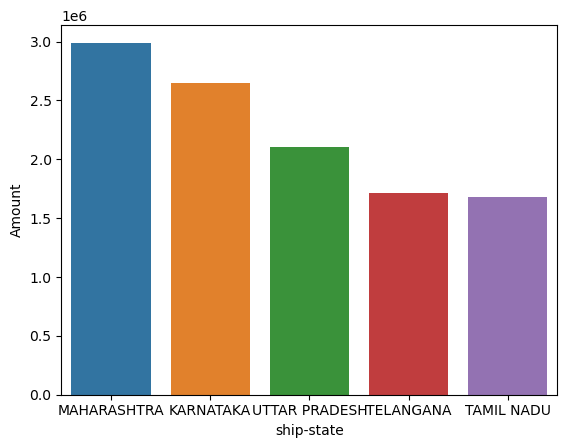

In [93]:
ax = sns.barplot(x = 'ship-state', y ='Amount', data =ship_state, errorbar=None)

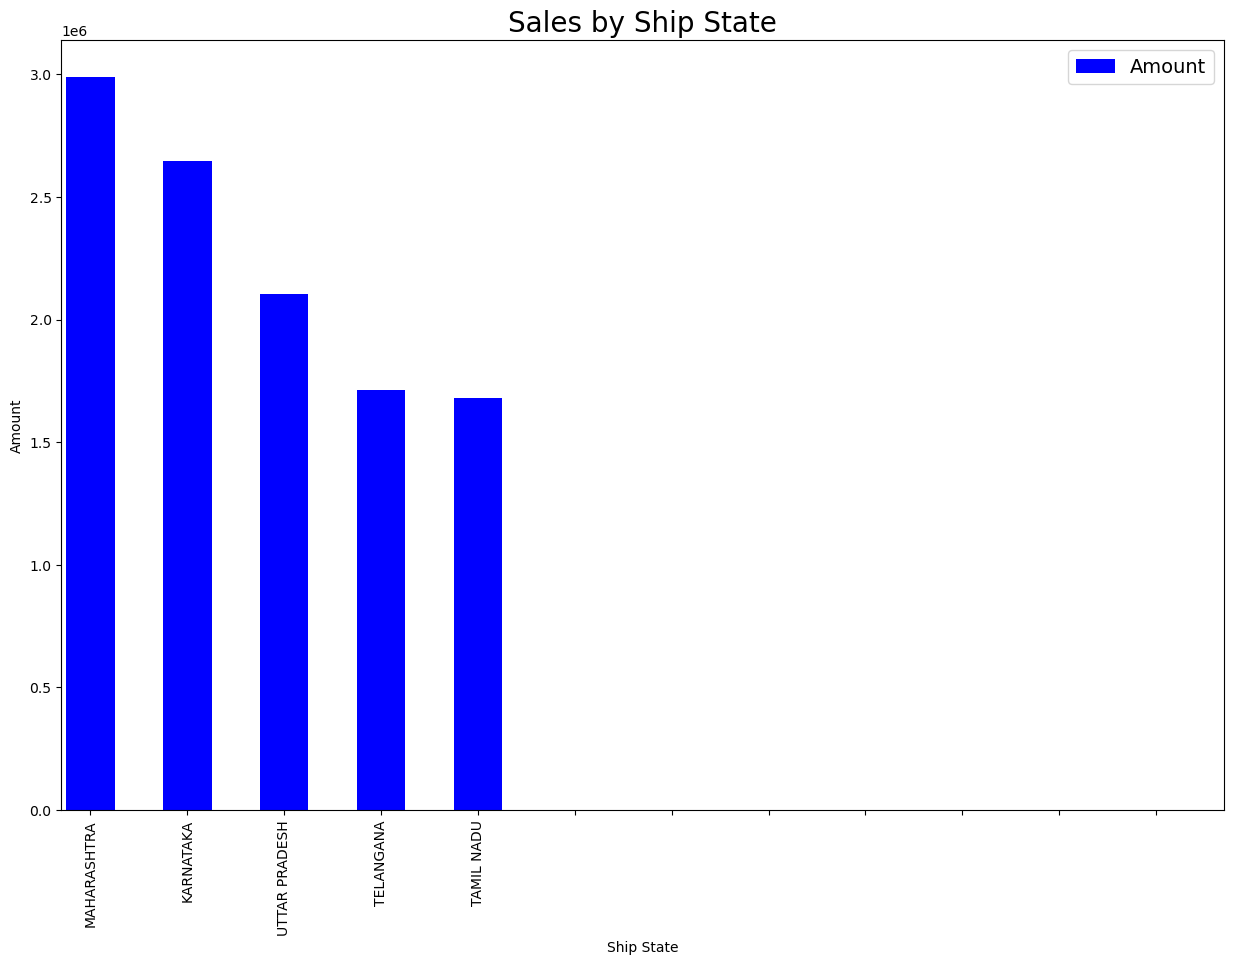

In [42]:
weight = 0.30

ship_state[["Amount"]].plot(kind="bar", color = ["blue"], figsize=(15,10))


plt.xticks(range(0,len(result["Amount"])), rotation = 90)
plt.title("Sales by Ship State", fontsize = 20)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Ship State")
plt.ylabel("Amount")
plt.xlim(-weight, len(result["Amount"])-weight)
plt.show()

# examples of Kind
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [43]:
# Show the relation between Age and gender based on the number of orders.

vrinda_store['Qty'] = 1

vrinda_store_age_gender = vrinda_store.groupby(['Gender','Age'])['Qty'].sum()

print(vrinda_store_age_gender)

print(vrinda_store_age_gender.head(30))

print(vrinda_store_age_gender.tail(30))








Gender  Age
Men     18     213
        19     215
        20     243
        21     266
        22     255
              ... 
Women   74     153
        75     144
        76     144
        77     144
        78     162
Name: Qty, Length: 122, dtype: int64
Gender  Age
Men     18     213
        19     215
        20     243
        21     266
        22     255
        23     236
        24     222
        25     248
        26     231
        27     236
        28     230
        29     260
        30     233
        31     214
        32     233
        33     228
        34     218
        35     247
        36     237
        37     234
        38     267
        39     263
        40     241
        41     264
        42     233
        43     246
        44     236
        45     244
        46     253
        47     236
Name: Qty, dtype: int64
Gender  Age
Women   49     517
        50     121
        51     155
        52     144
        53     144
        54     161
        55

In [55]:
# Show the relation between Age and gender based on the number of orders.

vrinda_store['Age'].describe()



count    31047.000000
mean        39.496570
std         15.117233
min         18.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         78.000000
Name: Age, dtype: float64

In [105]:
# Show the relation between Age and gender based on the number of orders.

vrinda_store['age_group'] = pd.cut(vrinda_store.Age, bins=[18,30,50,78], labels=['Youth', 'Adults', 'Elderly'])

#vrinda_store.insert(4, 'Age Group', 'age_group')

vrinda_store

,Order ID,Cust ID,Gender,Age,Age Group,Date,Status,Channel,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Month,age_group
index,,,,,,,,,,,,,,,,,,,,,
1,171-1029312-3038738,1029312,Women,44,age_group,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,...,1,INR,376,MOHALI,PUNJAB,140301,IN,False,December,Adults
2,405-2183842-2225946,2183842,Women,29,age_group,2022-12-04,Delivered,Ajio,SET414-KR-NP-L,Set,...,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False,December,Youth
3,171-1641533-8921966,1641533,Women,67,age_group,2022-12-04,Delivered,Myntra,SET261-KR-PP-S,Set,...,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False,December,Elderly
4,404-7490807-6300351,7490807,Women,20,age_group,2022-12-04,Delivered,Amazon,SET110-KR-PP-M,Set,...,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False,December,Youth
5,403-9293516-4577154,9293516,Women,62,age_group,2022-12-04,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,...,1,INR,544,GURUGRAM,HARYANA,122001,IN,False,December,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31043,405-4724097-1016369,4724097,Men,60,age_group,2022-01-06,Delivered,Flipkart,J0083-KR-XL,kurta,...,1,INR,565,PUNE,MAHARASHTRA,412307,IN,False,January,Elderly
31044,405-4724097-1016369,4724097,Men,34,age_group,2022-01-06,Delivered,Myntra,J0010-LCD-S,Set,...,1,INR,939,BENGALURU,KARNATAKA,560061,IN,False,January,Adults
31045,408-3572295-5992330,3572295,Men,29,age_group,2022-01-06,Delivered,Amazon,SET398-KR-PP-L,Set,...,1,INR,1115,PITHORAGARH,UTTARAKHAND,262501,IN,False,January,Youth


In [77]:
vrinda_store[['Order ID', 'Age', 'age_group']].head(7)

,Order ID,Age,age_group
index,,,
1,171-1029312-3038738,44,Adults
2,405-2183842-2225946,29,Youth
3,171-1641533-8921966,67,Elderly
4,404-7490807-6300351,20,Youth
5,403-9293516-4577154,62,Elderly
6,407-1298130-0368305,49,Adults
7,407-1298130-0368305,23,Youth


In [91]:
age_count =vrinda_store.groupby(['age_group', 'Gender'], as_index=False)['Order ID'].count()

age_count

,age_group,Gender,Order ID
0,Youth,Men,2875
1,Youth,Women,6548
2,Adults,Men,4629
3,Adults,Women,10344
4,Elderly,Men,1777
5,Elderly,Women,4132


[Text(0, 0, '6548'), Text(0, 0, '10344'), Text(0, 0, '4132')]

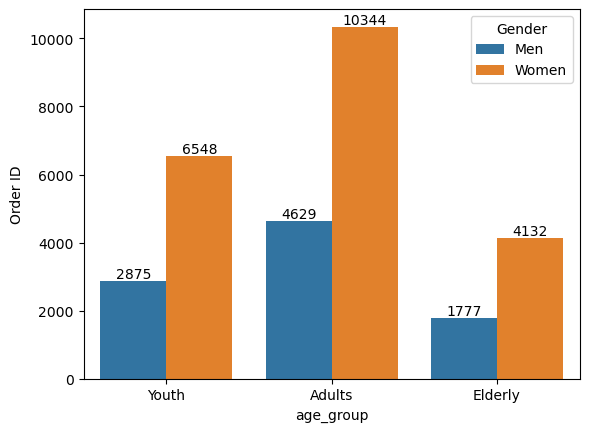

In [94]:
ax = sns.barplot(x='age_group', y='Order ID', hue='Gender', data=age_count, errorbar= None)

ax.bar_label(ax.containers[0])

ax.bar_label(ax.containers[1])

Text(0.5, 1.0, 'Age Vs Gender')

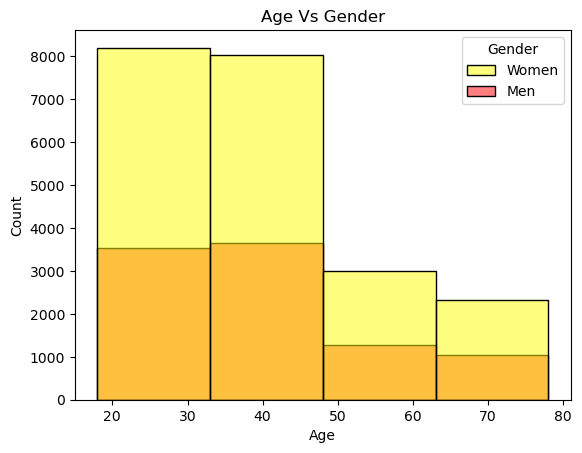

In [98]:
sns.histplot(data=vrinda_store, x = 'Age', bins = 4, hue='Gender', palette=['yellow', 'red']).set_title('Age Vs Gender')

In [113]:
# Which channel is contributing to maximum sales?

channel_max = vrinda_store.groupby(['Channel '], as_index=True).aggregate({'Amount':'sum'})

channel_max






,Amount
Channel,
Ajio,1331427
Amazon,7519933
Flipkart,4573301
Meesho,927606
Myntra,4941540
Nalli,1015329
Others,867241


In [114]:
channel_max.idxmax()

Amount    Amazon
dtype: object

In [45]:
# Highest Selling Category?

vrinda_store_age_gender.idxmax()

('Women', 28)

In [46]:
vrinda_store_age_gender.info()

<class 'pandas.core.series.Series'>
MultiIndex: 122 entries, ('Men', 18) to ('Women', 78)
Series name: Qty
Non-Null Count  Dtype
--------------  -----
122 non-null    int64
dtypes: int64(1)
memory usage: 1.8+ KB
